In [2]:
import os
from utilities import preprocessDICOM
import numpy as np

In [3]:
path2dcm = '/home/alokdwivedi/dev/avanid/data/qarc/dicom'
outputdir = '/home/alokdwivedi/dev/avanid/data/qarc/numpy'

In [11]:
for root, dirs, files in os.walk(path2dcm):
    for name in files:
        print(name)
    for name in dirs:
        print(name)

201489
205047
CT.201489.81.dcm
CT.201489.68.dcm
CT.201489.57.dcm
CT.201489.12.dcm
CT.201489.15.dcm
CT.201489.73.dcm
CT.201489.72.dcm
CT.201489.60.dcm
CT.201489.40.dcm
CT.201489.95.dcm
CT.201489.87.dcm
CT.201489.27.dcm
CT.201489.55.dcm
CT.201489.29.dcm
CT.201489.13.dcm
CT.201489.22.dcm
CT.201489.79.dcm
CT.201489.63.dcm
CT.201489.90.dcm
CT.201489.16.dcm
CT.201489.88.dcm
CT.201489.86.dcm
CT.201489.24.dcm
CT.201489.17.dcm
CT.201489.34.dcm
CT.201489.70.dcm
CT.201489.62.dcm
CT.201489.3.dcm
CT.201489.91.dcm
CT.201489.38.dcm
CT.201489.43.dcm
CT.201489.76.dcm
CT.201489.80.dcm
CT.201489.30.dcm
CT.201489.32.dcm
CT.201489.7.dcm
CT.201489.33.dcm
CT.201489.18.dcm
CT.201489.28.dcm
CT.201489.23.dcm
CT.201489.93.dcm
CT.201489.58.dcm
CT.201489.97.dcm
CT.201489.66.dcm
CT.201489.6.dcm
CT.201489.25.dcm
CT.201489.39.dcm
CT.201489.21.dcm
CT.201489.47.dcm
CT.201489.75.dcm
CT.201489.84.dcm
CT.201489.96.dcm
CT.201489.20.dcm
CT.201489.2.dcm
CT.201489.53.dcm
CT.201489.48.dcm
CT.201489.26.dcm
CT.201489.35.dcm
CT.2

In [10]:
pathlist = []
RTstrfiles=[]

for x,_,_ in os.walk(path2dcm):
    pathlist.append(x)
pathlist.pop(0)
len(pathlist)

4

In [11]:
print(pathlist)
print(RTstrfiles)

['/home/alokdwivedi/dev/avanid/data/qarc/dicom/201489', '/home/alokdwivedi/dev/avanid/data/qarc/dicom/201489/test123', '/home/alokdwivedi/dev/avanid/data/qarc/dicom/201489/test123/test234', '/home/alokdwivedi/dev/avanid/data/qarc/dicom/205047']
[]


In [22]:
DoneFiles = []
NotDoneFiles = []
for k in range(len(pathlist)):
    path2Rtstr = []
    for i in os.listdir(pathlist[k]):
        if 'RS' in i:
            path2Rtstr.append(i)
    RTstrPath = os.path.join(pathlist[k],path2Rtstr[0])
    DICOMpath = pathlist[k]
    patient_id = RTstrPath[-10:][:6]
    fname = os.path.join(outputdir,patient_id + '.npy')
    
    try:
        print(f'Going to generate cropped {fname}')
        img = preprocessDICOM.preprocess(DICOMpath,RTstrPath,zero=False)
    except:
        print(f'Could not Convert -- {fname}')
        NotDoneFiles.append(fname)
    np.save(fname,img)
    print(f'{fname} Cropped Successfully')
    DoneFiles.append(fname)

Going to generate cropped /home/alokdwivedi/dev/avanid/data/qarc/numpy/201489.npy
/home/alokdwivedi/dev/avanid/data/qarc/numpy/201489.npy Cropped Successfully
Going to generate cropped /home/alokdwivedi/dev/avanid/data/qarc/numpy/205047.npy


/home/alokdwivedi/dev/avanid/github/qarc_utilities/utilities/preprocessDICOM.py:141: RuntimeWarning: Mean of empty slice.
  coords.append([np.round(x_val_arr.mean()),np.round(y_val_arr.mean()),np.round(z_val_arr.mean())])
/usr/local/lib/python3.8/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


/home/alokdwivedi/dev/avanid/data/qarc/numpy/205047.npy Cropped Successfully


In [23]:
IDs = []
for k in range(len(pathlist)):
    for i in os.listdir(pathlist[k]):
        if 'RS' in i:
            IDs.append(int(i[3:9]))
    

In [24]:
# Assume only one file with RS per patient folder
ID = IDs[1]
print(ID)


205047


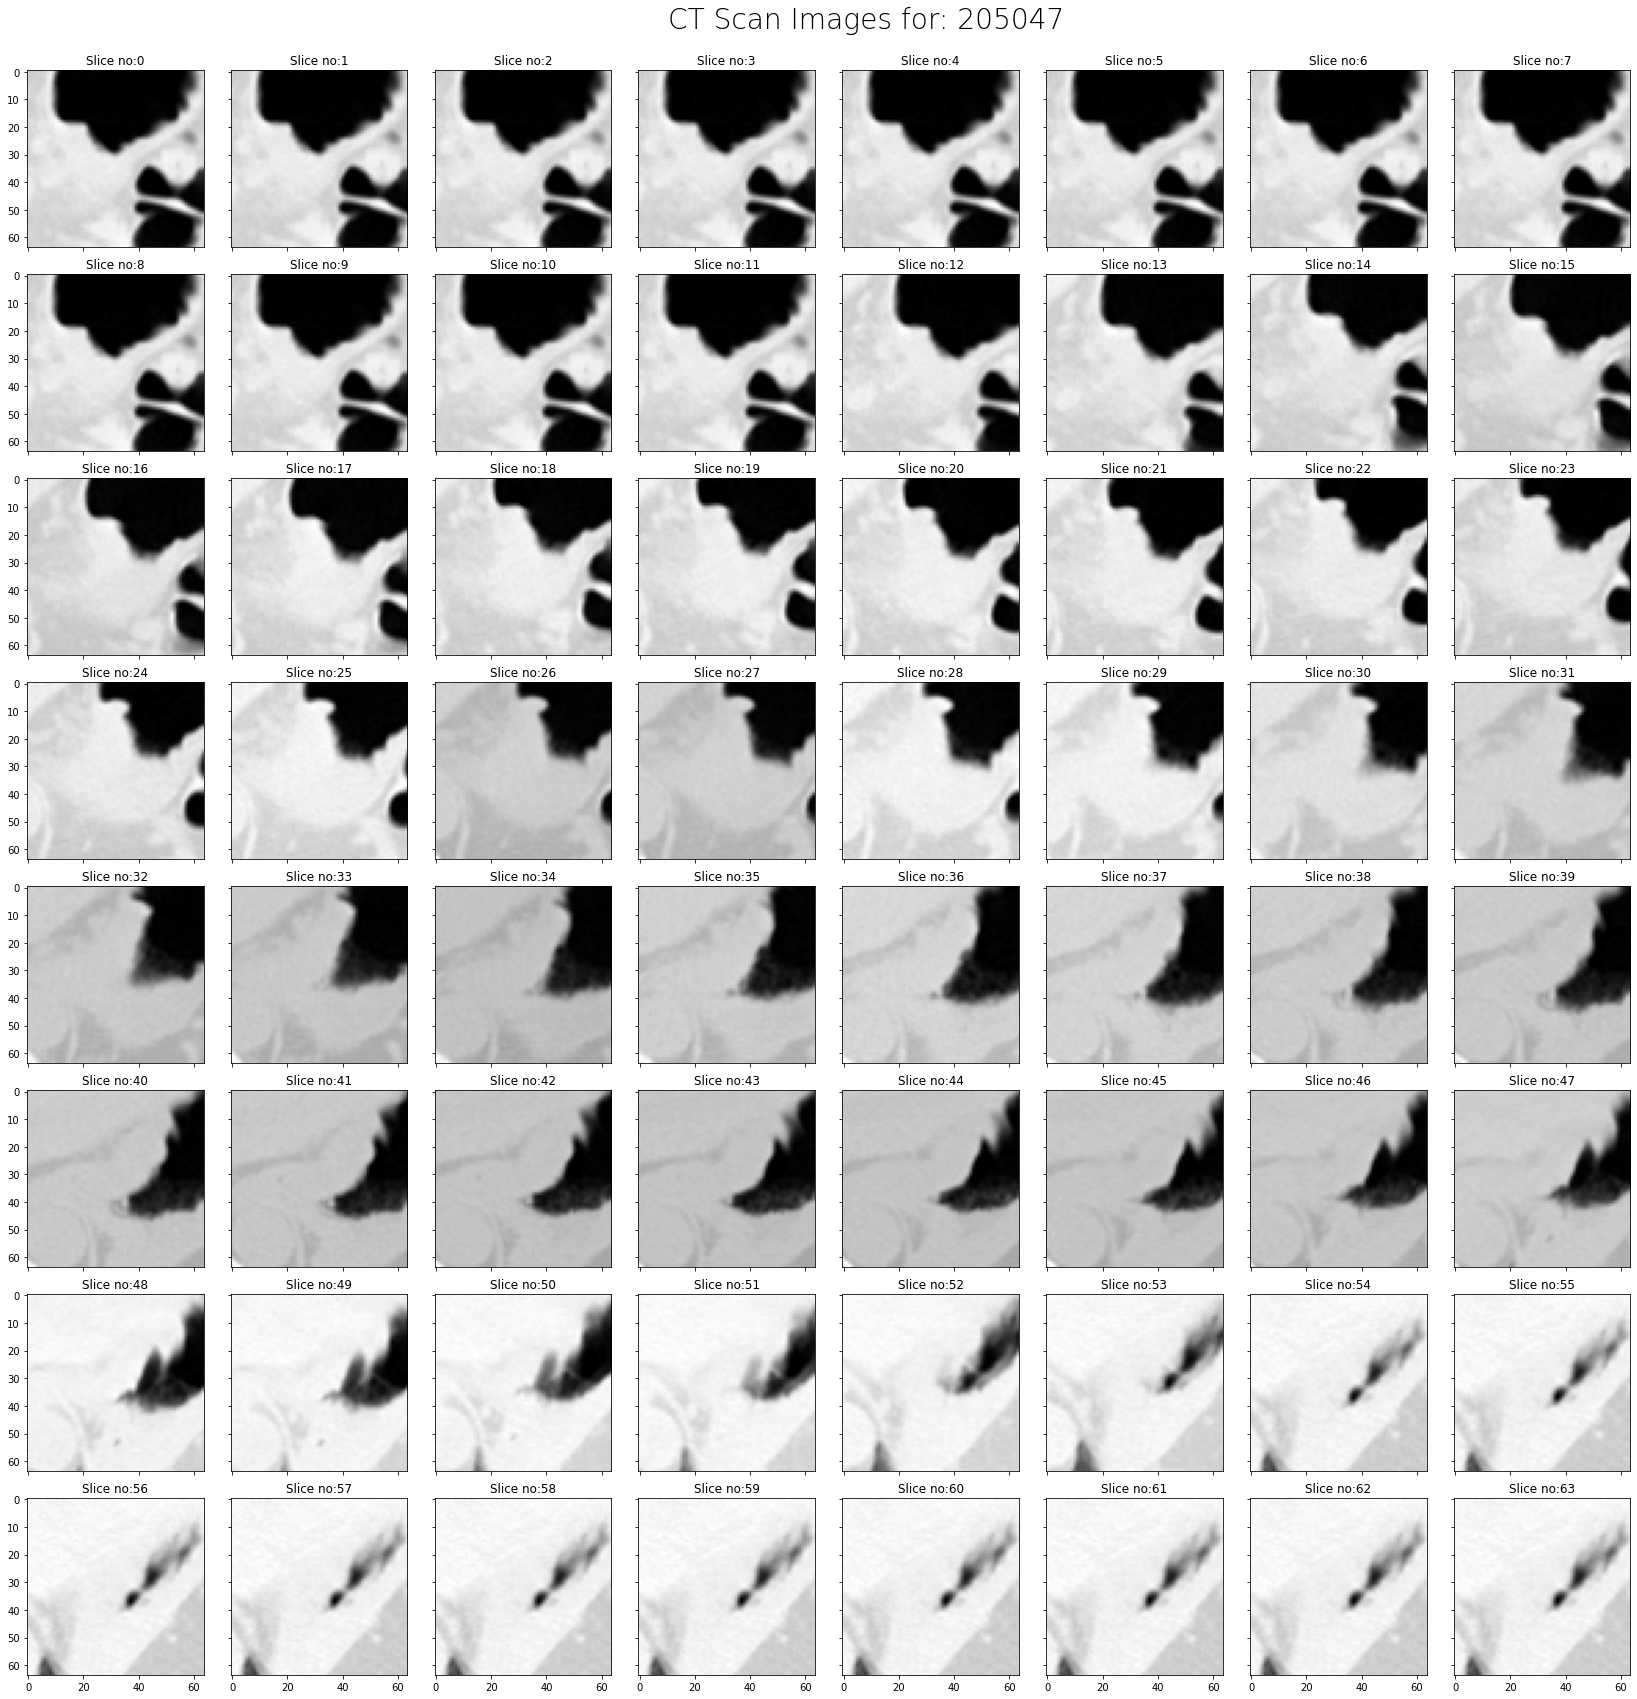

In [25]:
from utilities import utilities
utilities.check_numpy_images(ID,img_path=outputdir,rotate=False)

# Issues with Scans

- Oral Contrast - 129143, 153203
- Oral Contrast - 146062, 150224